In [1]:
import pandas as pd 
import os 
import pathlib
# pd.set_option("display.max_rows", 100)

import matplotlib.pylab as pylt
pylt.rcParams['figure.dpi'] = 200
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sudulunu.helpers import pp, make_num, dumper

In [2]:
iterrer = pathlib.Path('api_data')
fillos = list(iterrer.rglob("*.csv"))

# ['visaSubclassCode', 'visaSubclassText', 'visaSubclassSort', 'visaCategory', 'streamCode', 
# 'streamText', 'percent75', 'percent90', 'percent25', 'percent50', 'updated', 'endDate', 'additionalInfo']


listo = []

for fillo in fillos:
    inter = pd.read_csv(str(fillo)) 

    inter = inter[['visaSubclassCode','visaSubclassSort', 'streamText', 'percent75', 'percent90', 'percent25', 'percent50', 'updated', 'endDate',]]
    # print(inter.columns.tolist())

    inter = inter.loc[inter['visaSubclassSort'].str.contains("Partner")]

    listo.append(inter)




cat = pd.concat(listo)

# print(cat['percent75'].unique().tolist())


In [3]:
bat = cat.copy()

import re 

bat['endDate'] = pd.to_datetime(bat['endDate'], format='%d %B %Y')
bat.sort_values(by=['endDate'], ascending=True, inplace=True)

def day_worker(thingo):

    # print(thingo)
    matcher = re.search(r'(\d{1,2})',thingo)

    num = int(matcher.group(1))


    matcher = re.search(r'([a-zA-Z]+)', thingo)

    unit = matcher.group(1)

    if unit.lower().strip() == 'months':
        return num * 30
    
    elif unit.lower().strip() == 'days':
        return num
    
    elif unit.lower().strip() == 'years':
        return num * 365
    print(unit)


# bat = bat[:1]

for col in ['percent75', 'percent90', 'percent25', 'percent50', ]:

    bat[col] = bat[col].apply(lambda x : day_worker(x))

bat.drop_duplicates(subset=['endDate', 'visaSubclassSort'], keep='last', inplace=True)

pp(bat)

   visaSubclassCode                             visaSubclassSort streamText  \
2               100  100 - Partner (Migrant) visa (subclass 100)        NaN   
24              309  309 - Partner (Provisional)  (subclass 309)        NaN   
59              801                 801 - Partner (subclass 801)        NaN   
62              820                 820 - Partner (subclass 820)        NaN   
2               100  100 - Partner (Migrant) visa (subclass 100)        NaN   
..              ...                                          ...        ...   
62              820                 820 - Partner (subclass 820)        NaN   
62              820                 820 - Partner (subclass 820)        NaN   
2               100  100 - Partner (Migrant) visa (subclass 100)        NaN   
24              309  309 - Partner (Provisional)  (subclass 309)        NaN   
59              801                 801 - Partner (subclass 801)        NaN   

    percent75  percent90  percent25  percent50     

   visaSubclassCode              visaSubclassSort streamText  percent75  \
59              801  801 - Partner (subclass 801)        NaN        480   
58              801  801 - Partner (subclass 801)        NaN        420   
58              801  801 - Partner (subclass 801)        NaN        480   
58              801  801 - Partner (subclass 801)        NaN        420   
59              801  801 - Partner (subclass 801)        NaN        510   
59              801  801 - Partner (subclass 801)        NaN        390   
59              801  801 - Partner (subclass 801)        NaN        330   
59              801  801 - Partner (subclass 801)        NaN        300   
59              801  801 - Partner (subclass 801)        NaN        480   
59              801  801 - Partner (subclass 801)        NaN        390   
59              801  801 - Partner (subclass 801)        NaN        330   
59              801  801 - Partner (subclass 801)        NaN        330   
59              801  801 

<Axes: xlabel='endDate', ylabel='percent50'>

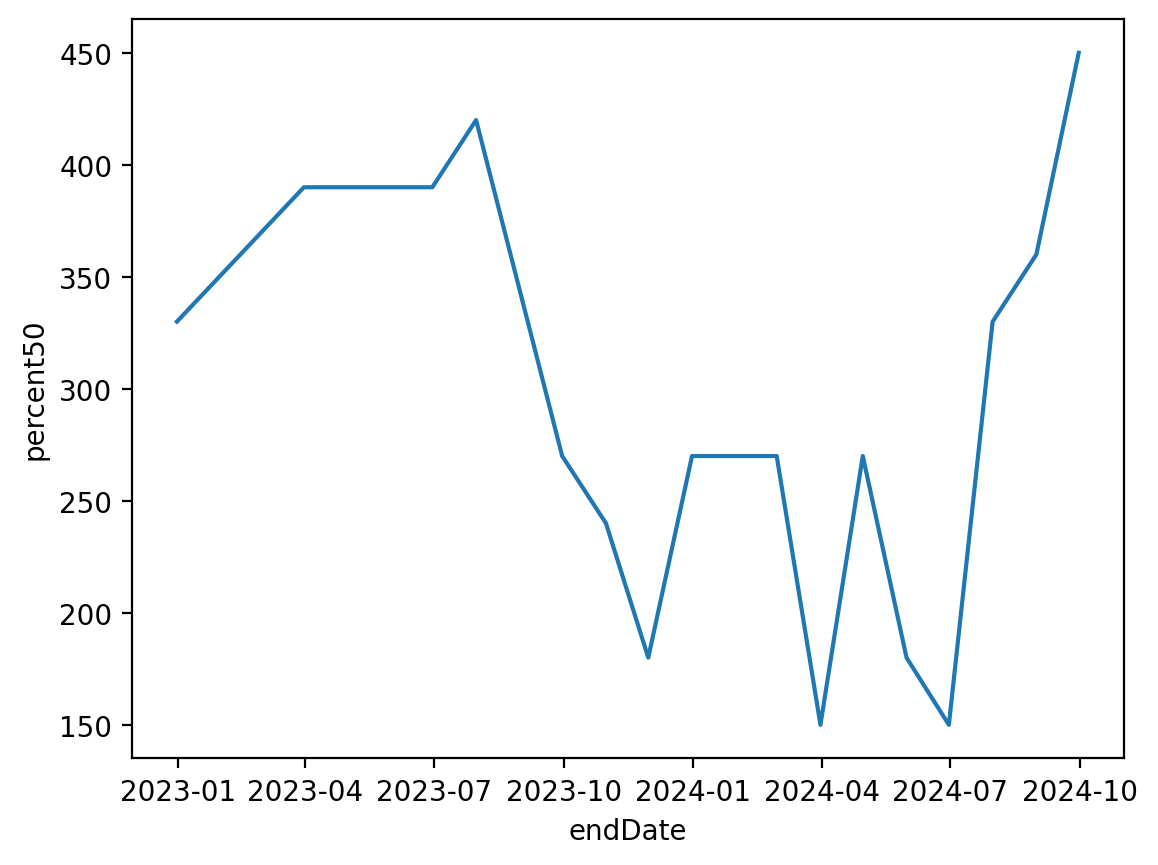

In [11]:
mat = bat.copy()
mat = mat.loc[mat['visaSubclassCode'] == 801]

pp(mat)

sns.lineplot(data=mat, x='endDate', y='percent50')